In [ ]:
pip install pycocotools matplotlib pillow

In [ ]:
import zipfile
zip_path='/content/drive/MyDrive/IIT_Delhi/Pedestrian_dataset_for_internship_assignment.zip'
final_path = '/content'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
   zip_ref.extractall(final_path)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


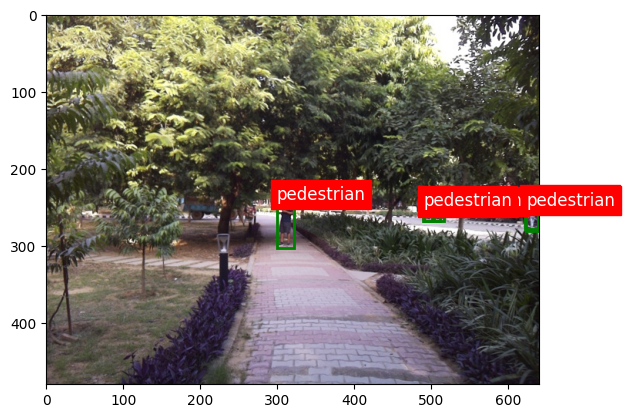

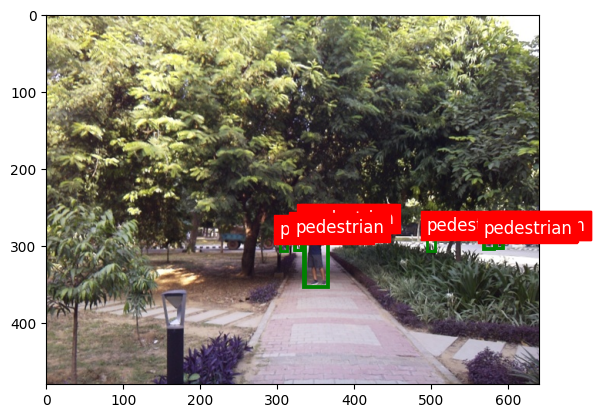

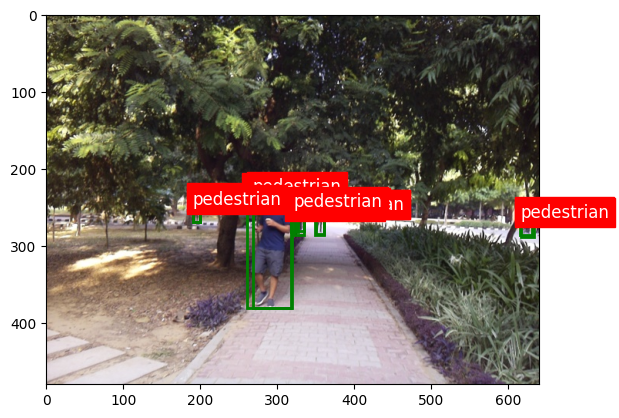

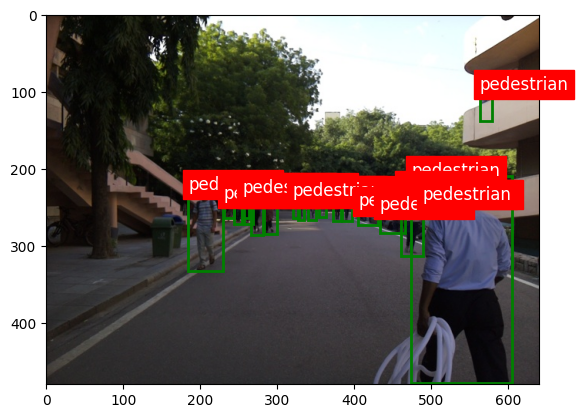

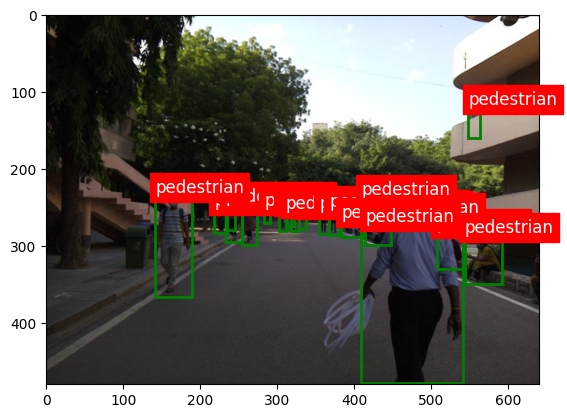

In [ ]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pycocotools.coco import COCO

# Load the COCO annotations
annotation_path = '/content/drive/MyDrive/IIT_Delhi/random_sample_mavi_2_gt.json'
coco = COCO(annotation_path)

# Directory where the images are stored
image_dir = '/content/Pedestrian_dataset_for_internship_assignment'

# Function to visualize a single image with bounding boxes
def visualize_image(image_id):
    # Load image metadata
    image_info = coco.loadImgs(image_id)[0]
    image_path = os.path.join(image_dir, image_info['file_name'])

    # Open the image
    image = Image.open(image_path)

    # Create a plot
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Get annotations for the specific image
    annotation_ids = coco.getAnnIds(imgIds=image_info['id'])
    annotations = coco.loadAnns(annotation_ids)

    # Loop through annotations and draw bounding boxes
    for ann in annotations:
        # Get the bounding box (bbox format is [x, y, width, height])
        x, y, width, height = ann['bbox']

        # Create a rectangle patch for each bounding box
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='g', facecolor='none')

        # Add the rectangle to the plot
        ax.add_patch(rect)

        # Add category label
        category = coco.loadCats(ann['category_id'])[0]['name']
        plt.text(x, y, category, color='white', fontsize=12, backgroundcolor='r')

    # Show the image with bounding boxes
    plt.show()

# Visualize a few images
for image_id in coco.getImgIds()[5:10]:  # Change range to view more images
    visualize_image(image_id)


# **Splitting Dataset**

In [ ]:
import json
import random
import os
import shutil

# Load COCO annotations file
annotation_path = '/content/drive/MyDrive/IIT_Delhi/random_sample_mavi_2_gt.json'
with open(annotation_path, 'r') as f:
    coco_data = json.load(f)

# Create directories for train, val, and annotations
train_image_dir = '/content/drive/MyDrive/IIT_Delhi/COCODIR/train2017/'
val_image_dir = '/content/drive/MyDrive/IIT_Delhi/COCODIR/val2017/'
annotation_dir = '/content/drive/MyDrive/IIT_Delhi/COCODIR/annotations/'

# Ensure directories exist
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(annotation_dir, exist_ok=True)

# Get the list of image IDs
image_ids = [image['id'] for image in coco_data['images']]

# Shuffle the image IDs randomly
random.shuffle(image_ids)

# Split into training (160 images) and validation (40 images)
train_image_ids = image_ids[:160]
val_image_ids = image_ids[160:]

# Helper function to filter annotations based on image IDs
def filter_data(image_ids, coco_data):
    # Filter images
    images = [image for image in coco_data['images'] if image['id'] in image_ids]

    # Filter annotations
    annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] in image_ids]

    return images, annotations

# Get training data (images and annotations)
train_images, train_annotations = filter_data(train_image_ids, coco_data)

# Get validation data (images and annotations)
val_images, val_annotations = filter_data(val_image_ids, coco_data)

# Create the training and validation datasets in COCO format
train_coco_data = {
    'images': train_images,
    'annotations': train_annotations,
    'categories': coco_data['categories']
}

val_coco_data = {
    'images': val_images,
    'annotations': val_annotations,
    'categories': coco_data['categories']
}

# Save the new annotations as JSON files
with open(os.path.join(annotation_dir, 'instances_train2017.json'), 'w') as f:
    json.dump(train_coco_data, f)

with open(os.path.join(annotation_dir, 'instances_val2017.json'), 'w') as f:
    json.dump(val_coco_data, f)

# Move training images to train2017/ and validation images to val2017/
image_dir = '/content/Pedestrian_dataset_for_internship_assignment'

for image in train_images:
    image_path = os.path.join(image_dir, image['file_name'])
    shutil.copy(image_path, train_image_dir)

for image in val_images:
    image_path = os.path.join(image_dir, image['file_name'])
    shutil.copy(image_path, val_image_dir)

print("Dataset split and files organized successfully.")


Dataset split and files organized successfully.


# **Github Clone**

In [ ]:
!git clone https://github.com/IDEA-Research/DINO.git
%cd DINO


fatal: destination path 'DINO' already exists and is not an empty directory.
/content/DINO


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!pip install opencv-python-headless


In [ ]:
%cd models/dino/ops
!python setup.py build install


/content/DINO/models/dino/ops
running build
running build_py
copying functions/__init__.py -> build/lib.linux-x86_64-cpython-310/functions
copying functions/ms_deform_attn_func.py -> build/lib.linux-x86_64-cpython-310/functions
copying modules/ms_deform_attn.py -> build/lib.linux-x86_64-cpython-310/modules
copying modules/__init__.py -> build/lib.linux-x86_64-cpython-310/modules
running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:495: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:414: UserWarning: The detected CUDA version (12.2) has a minor version mismatch with the version that was used to compile PyTorch (12.1). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cu

In [ ]:
!python test.py


* True check_forward_equal_with_pytorch_double: max_abs_err 8.67e-19 max_rel_err 2.35e-16
* True check_forward_equal_with_pytorch_float: max_abs_err 4.66e-10 max_rel_err 1.13e-07
* True check_gradient_numerical(D=30)
* True check_gradient_numerical(D=32)
* True check_gradient_numerical(D=64)
* True check_gradient_numerical(D=71)
* True check_gradient_numerical(D=1025)
Traceback (most recent call last):
  File "/content/DINO/models/dino/ops/test.py", line 86, in <module>
    check_gradient_numerical(channels, True, True, True)
  File "/content/DINO/models/dino/ops/test.py", line 76, in check_gradient_numerical
    gradok = gradcheck(func, (value.double(), shapes, level_start_index, sampling_locations.double(), attention_weights.double(), im2col_step))
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/gradcheck.py", line 2053, in gradcheck
    return _gradcheck_helper(**args)
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/gradcheck.py", line 2082, in _gradche

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?id=1eeAHgu-fzp28PGdIjeLe-pzGPMG2r2G_' -O checkpoint0011_4scale.pth


--2024-09-24 12:23:40--  https://drive.google.com/uc?id=1eeAHgu-fzp28PGdIjeLe-pzGPMG2r2G_
Resolving drive.google.com (drive.google.com)... 74.125.23.138, 74.125.23.113, 74.125.23.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eeAHgu-fzp28PGdIjeLe-pzGPMG2r2G_ [following]
--2024-09-24 12:23:40--  https://drive.usercontent.google.com/download?id=1eeAHgu-fzp28PGdIjeLe-pzGPMG2r2G_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.170.132, 2404:6800:4008:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.170.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2385 (2.3K) [text/html]
Saving to: ‘checkpoint0011_4scale.pth’

checkpoint0011_4sca 100%[===================>]   2.33K  --.-KB/s    in 0s      

2024-09-24 12:23:40 (27.8 MB/s) - ‘check

In [ ]:
!bash /content/DINO/scripts/DINO_eval.sh /content/drive/MyDrive/IIT_Delhi/COCODIR /content/checkpoint0011_4scale.pth


python3: can't open file '/content/DINO/models/dino/ops/main.py': [Errno 2] No such file or directory


In [ ]:
!pip install yapf==0.30.0

In [ ]:
!pip install addict
!pip install -r /content/DINO/requirements.txt


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-ozjcy4pt/pycocotools_701120eb89d94525b360d21615a4c182
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-ozjcy4pt/pycocotools_701120eb89d94525b360d21615a4c182
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-ozjcy4pt/panopticapi_bb384c9b1ca34ad6a5d7cb554bd71cb1
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-ozjcy4pt/panopticapi_bb384c9b1ca34ad6a5d7cb554bd71cb1
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done


In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!git config --global user.email "your_email@example.com"
!git config --global user.name "Your Name"


In [ ]:
!git clone https://github.com/ParamPratibha/CV_Intern_Visionlab_IITD_Assignment_Sep_2024.git


Cloning into 'CV_Intern_Visionlab_IITD_Assignment_Sep_2024'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
!cp /path/to/your/file /content/your_repository/
